# COD Workshop - Model Evaluation
This Notebook will serve as a guide on how to evaluate the predictions made by the COD Networks.
Before continuing with this notebook. Make sure that you have performed Network Training and Testing for the networks to be evaluated.

The Workshop follows training for these COD networks:
1. HitNet: https://github.com/HUuxiaobin/HitNet/blob/main/Train.py
2. PFNet: https://github.com/Mhaiyang/CVPR2021_PFNet
3. RISNet: https://github.com/Kki2Eve/RISNet

## Training Instructions:
1. Access each downloaded repository of the networks in the `Networks` directory.
2. Modify each of the Training files to direct towards the correct `Datasets` and `Checkpoints` directories for the COD10K dataset and checkpoint saving.
3. Run the Training File. Install Missing Dependencies if needed.

## Testing Instructions:
1. Access each downloaded repository of the networks in the `Networks` directory.
2. Modify each of the Testing files to direct towards the correct `Datasets`, `Checkpoints`, and `Results` directories for the COD10K dataset, checkpoint saving, and prediction saving.
3. Run the Testing File. Install Missing Dependencies if needed.

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import PIL.Image as Image
import importlib
import utils.visualize as utils
importlib.reload(utils)

<module 'utils.visualize' from 'd:\\MSLABS3 Workshop\\utils\\visualize.py'>

The following lines get the names of each image and ground truth in the sampled dataset.

In [2]:
imgs = [utils.get_img_root() + f for f in os.listdir(utils.get_img_root()) if f.endswith('.jpg') or f.endswith('.png')]
print(imgs)

['Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1299.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1300.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1320.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1329.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1331.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1377.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1386.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1405.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1424.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1432.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1453.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Terrestrial-23-Cat-1459.jpg', 'Datasets/Sampled_COD10K/Test/Image/COD10K-CAM-2-Te

In [3]:
gts = [utils.get_gt_root() + f for f in os.listdir(utils.get_gt_root()) if f.endswith('.tif') or f.endswith('.png')]
print(gts)

['Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1299.png', 'Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1300.png', 'Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1320.png', 'Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1329.png', 'Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1331.png', 'Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1377.png', 'Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1386.png', 'Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1405.png', 'Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1424.png', 'Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1432.png', 'Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1453.png', 'Datasets/Sampled_COD10K/Test/GT_Object/COD10K-CAM-2-Terrestrial-23-Cat-1459.png', 'Da

After doing so, we list down the folders where our network predictions are located to get the prediction images.

In [4]:
networks = ['PFNet_Custom', 'PFNet_WT', 'HitNet_Custom', 'HitNet_WT', 'RISNet_ND_Custom']


In [5]:
pred_roots = ["Results/" + network + "/Sampled_COD10K/" for network in networks]
preds_networks = [[pred_root + f for f in os.listdir(pred_root) if f.endswith('.tif') or f.endswith('.png')] for pred_root in pred_roots]

In [6]:
classes=["Chameleon", "Cat", "Dog", "Owl"]
COD_results = {
    cls: [img_dir.split("/")[4] for img_dir in imgs if "-"+cls+"-" in img_dir]
    for cls in classes
}

for cls in classes:
    print(cls, ":", len(COD_results[cls]))

Chameleon : 4
Cat : 14
Dog : 2
Owl : 10


In [7]:
# Add all image files in COD_results into one list
COD_results_list = [f for cls in COD_results for f in COD_results[cls]]
COD_results_list[0:5]

['COD10K-CAM-2-Terrestrial-26-Chameleon-1688.jpg',
 'COD10K-CAM-2-Terrestrial-26-Chameleon-1705.jpg',
 'COD10K-CAM-2-Terrestrial-26-Chameleon-1706.jpg',
 'COD10K-CAM-2-Terrestrial-26-Chameleon-1709.jpg',
 'COD10K-CAM-2-Terrestrial-23-Cat-1299.jpg']

We use a custom-built visualizer for showing the differences in network performance.

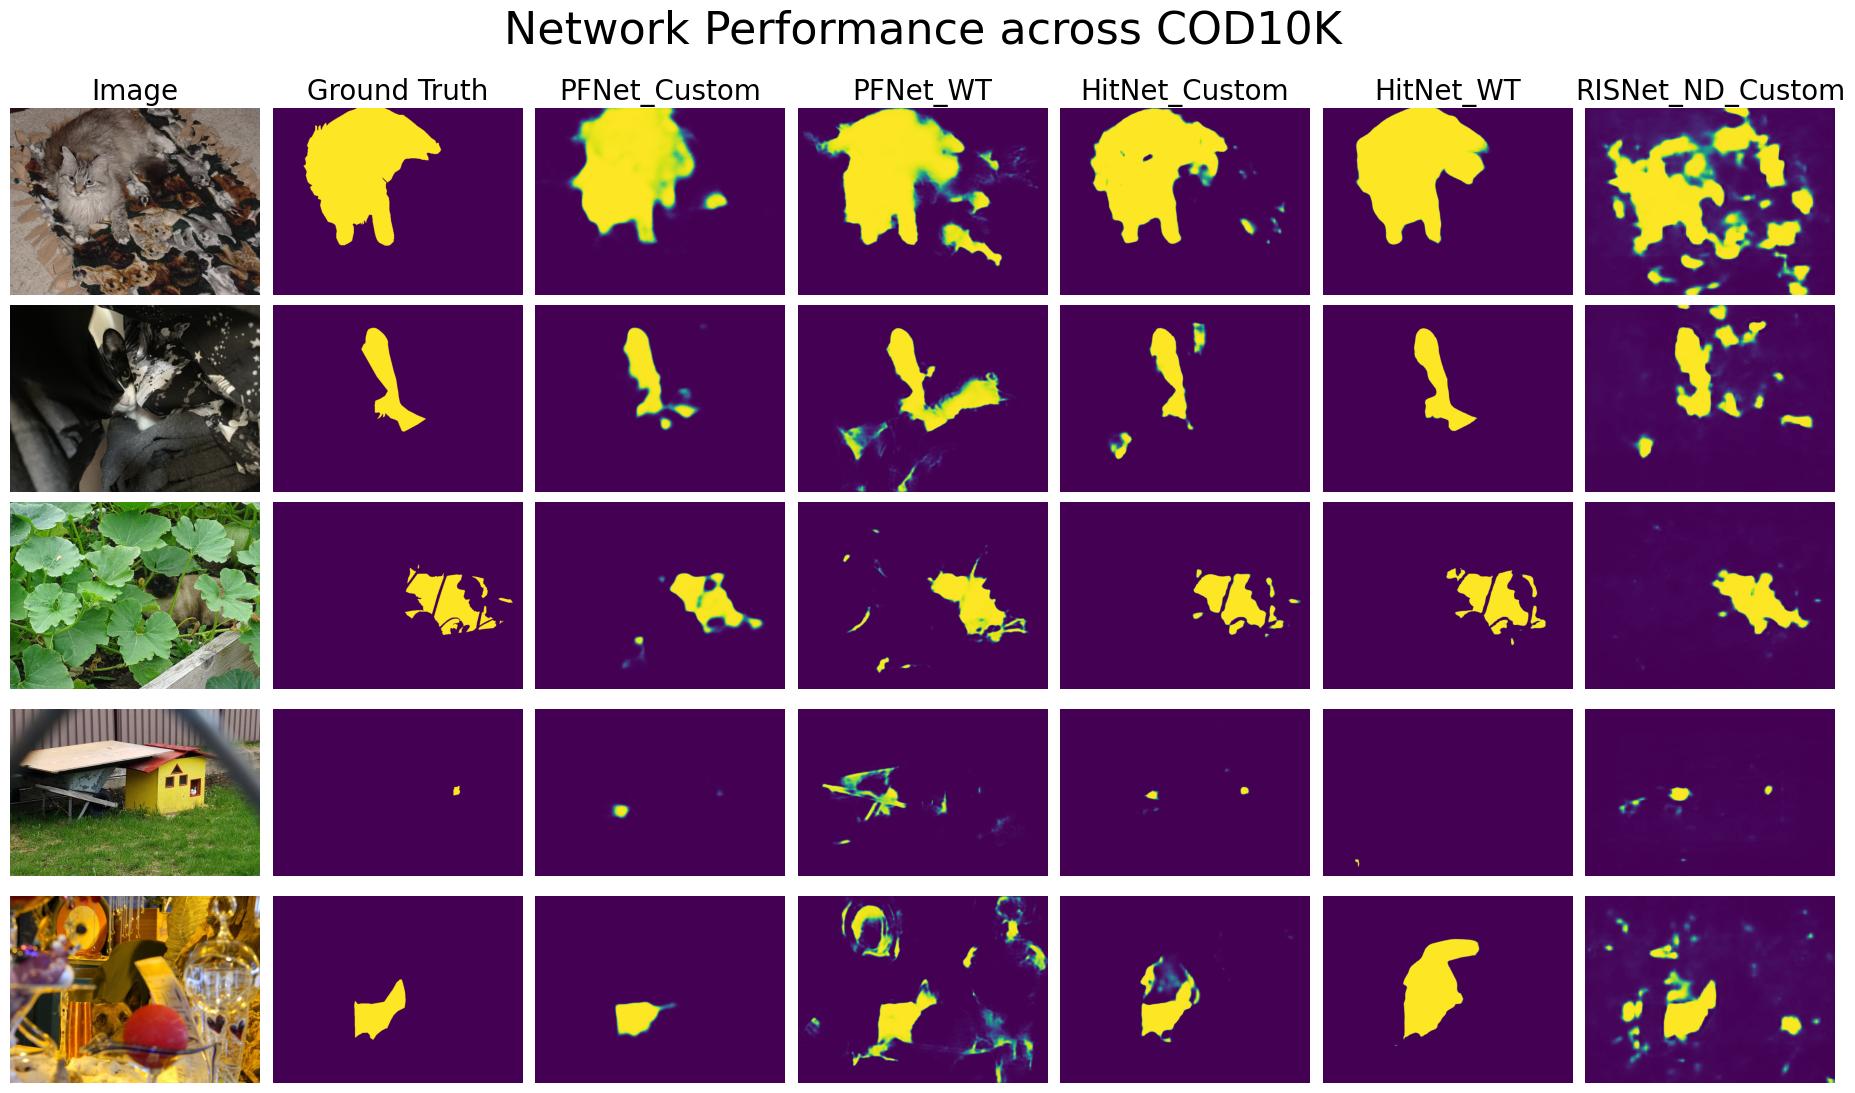

In [8]:
utils.display_images(images=5, 
                     image_files=COD_results_list, 
                     title=f"Network Performance across COD10K", 
                     save_path=f"results-general.png", networks=networks, pred_network_roots=pred_roots)

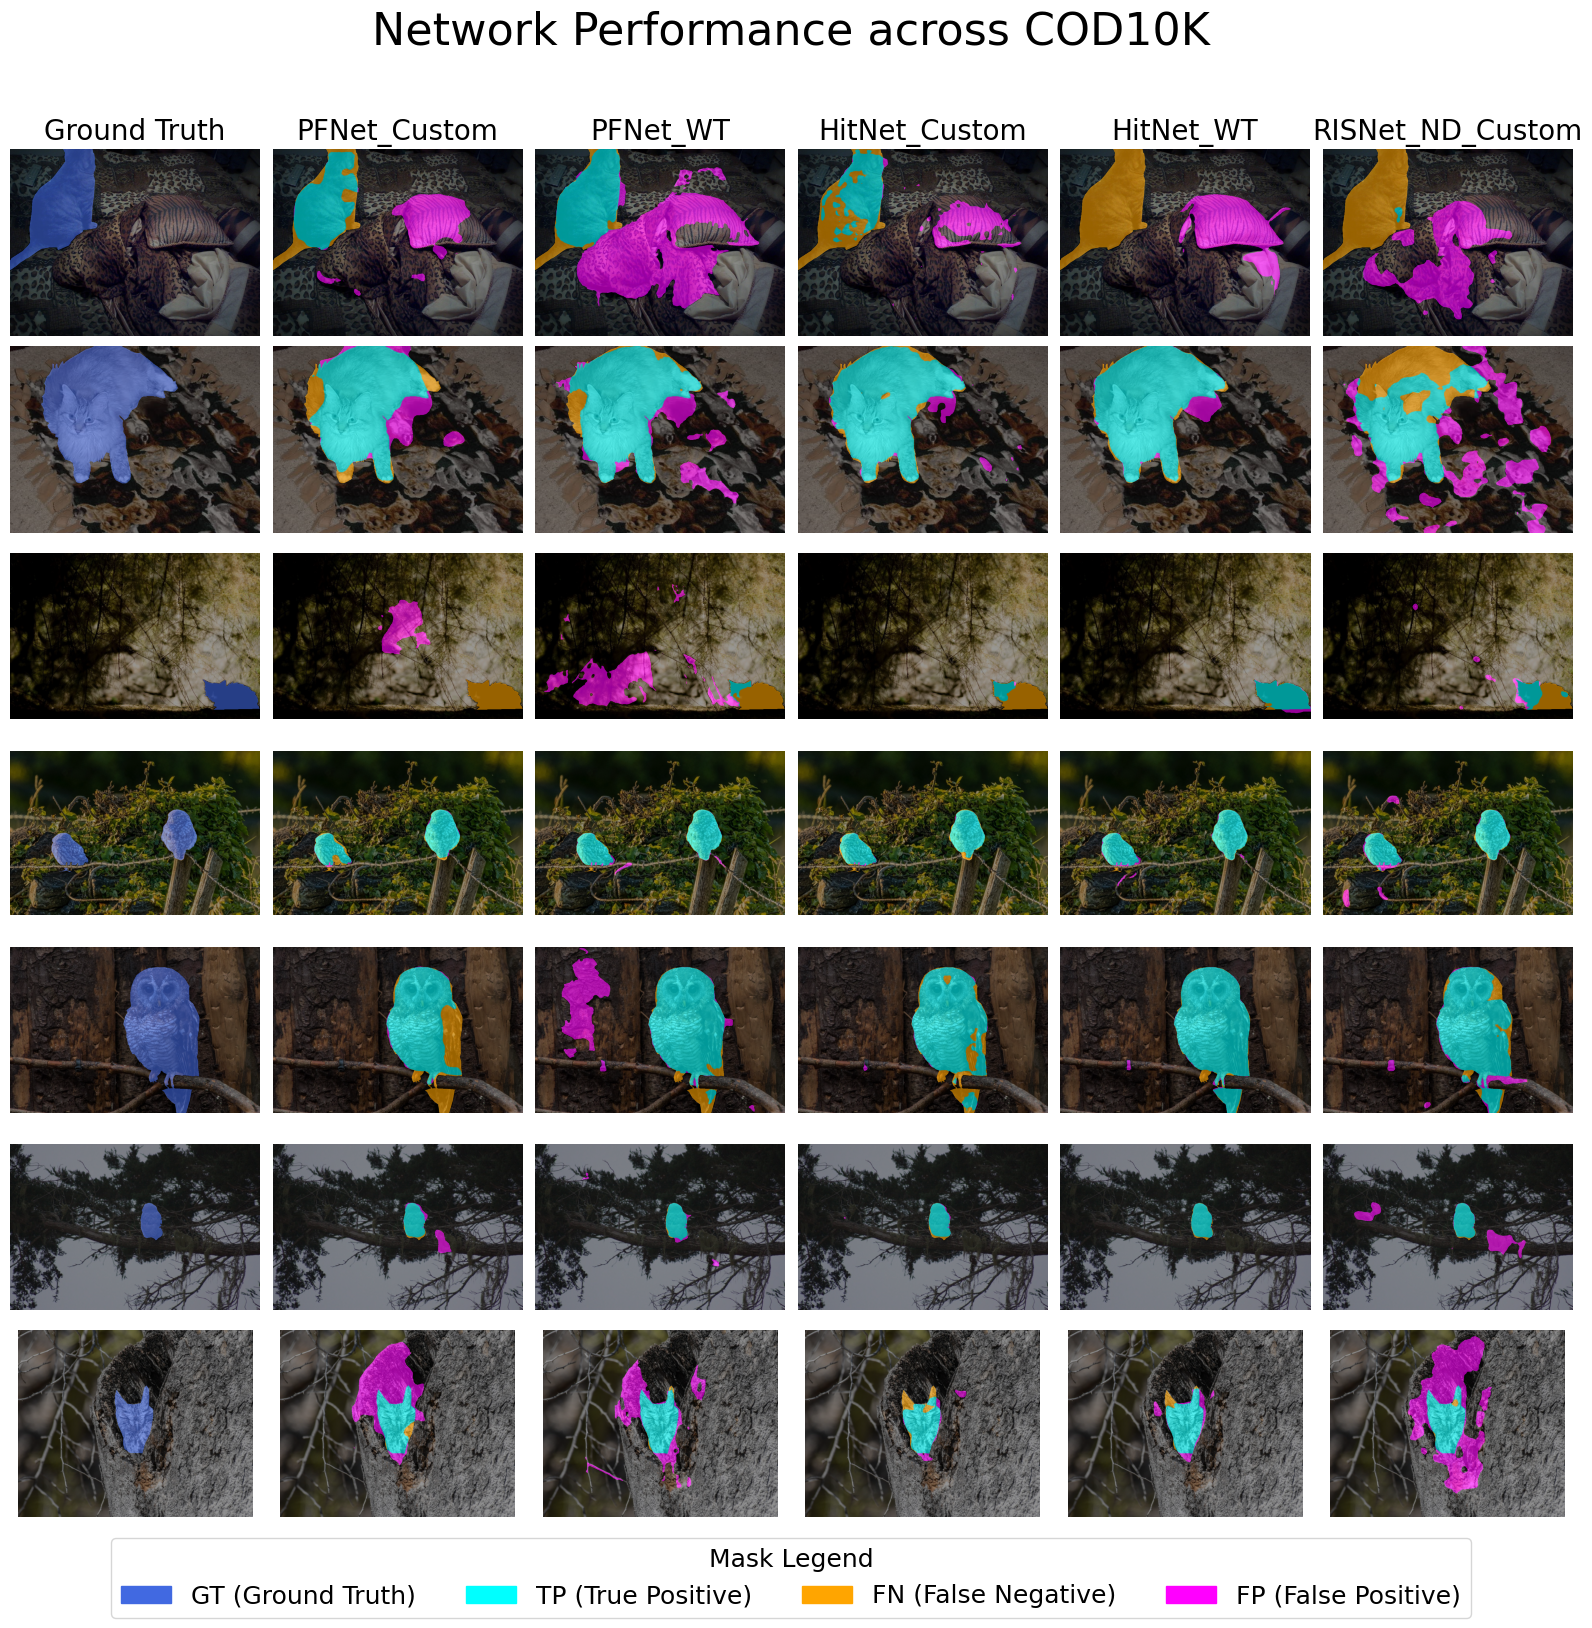

In [9]:
utils.display_images2(images=7, 
                     image_files=COD_results_list, 
                     title=f"Network Performance across COD10K", 
                     save_path=f"results-general.png", networks=networks, pred_network_roots=pred_roots)

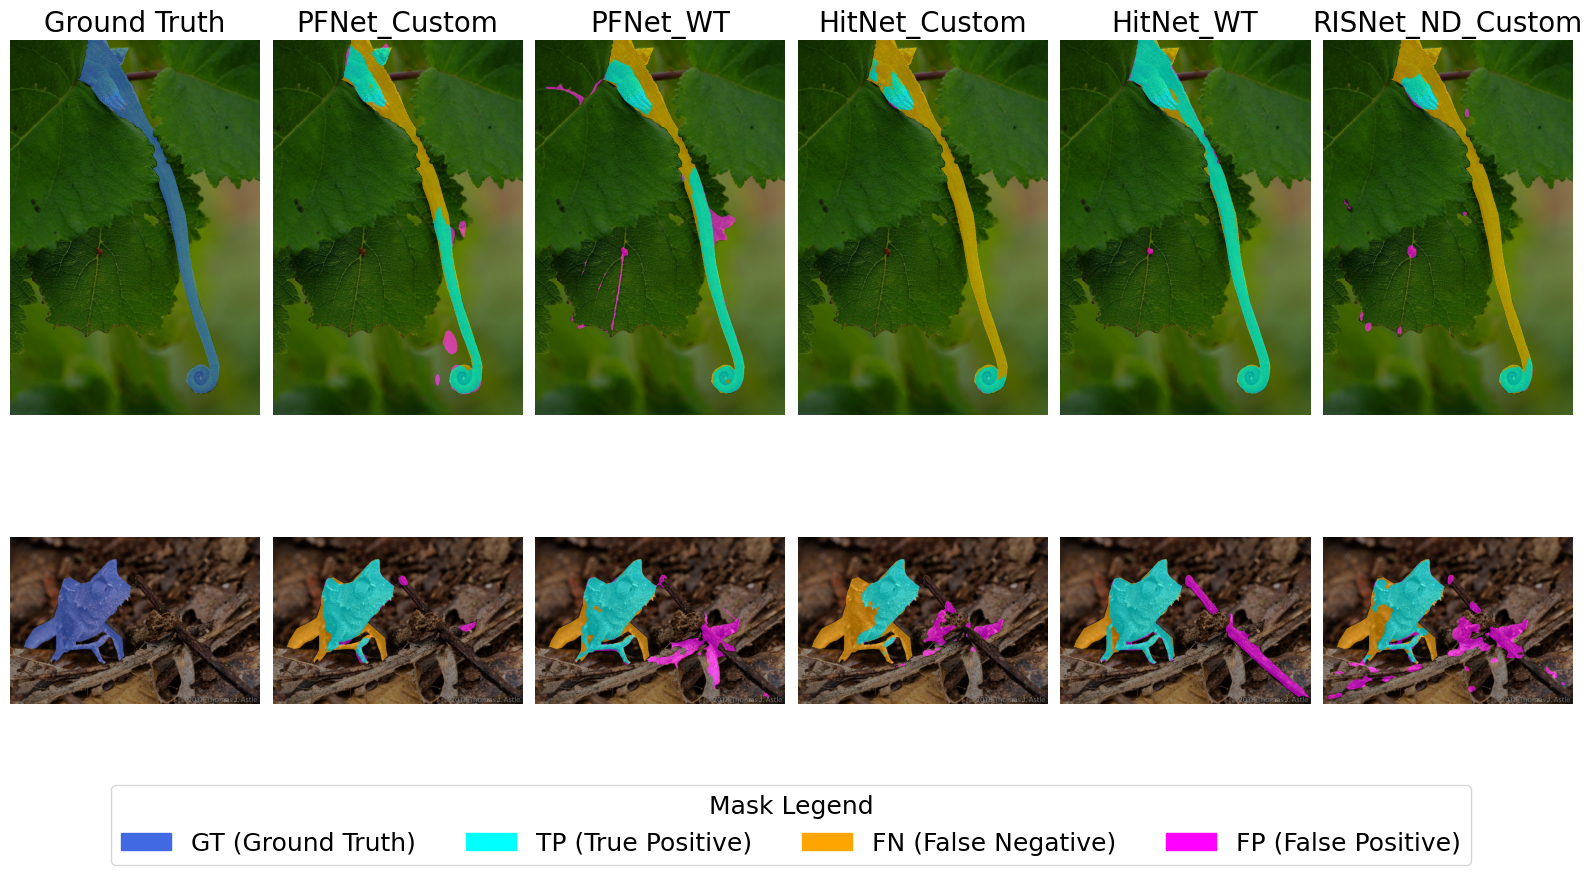

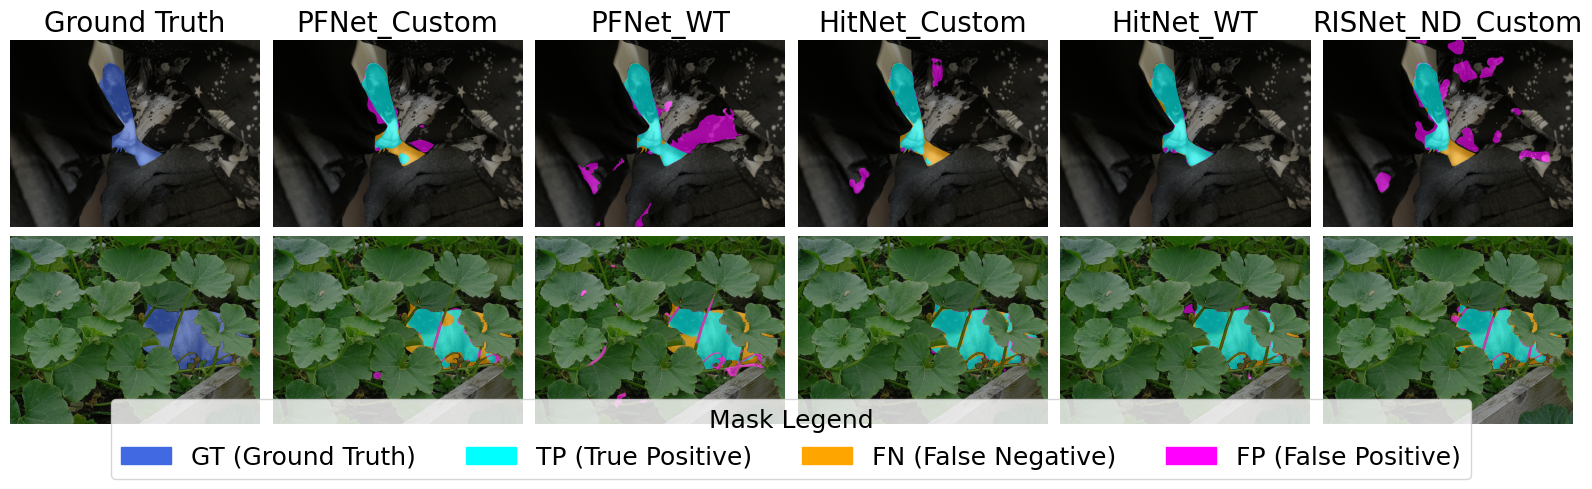

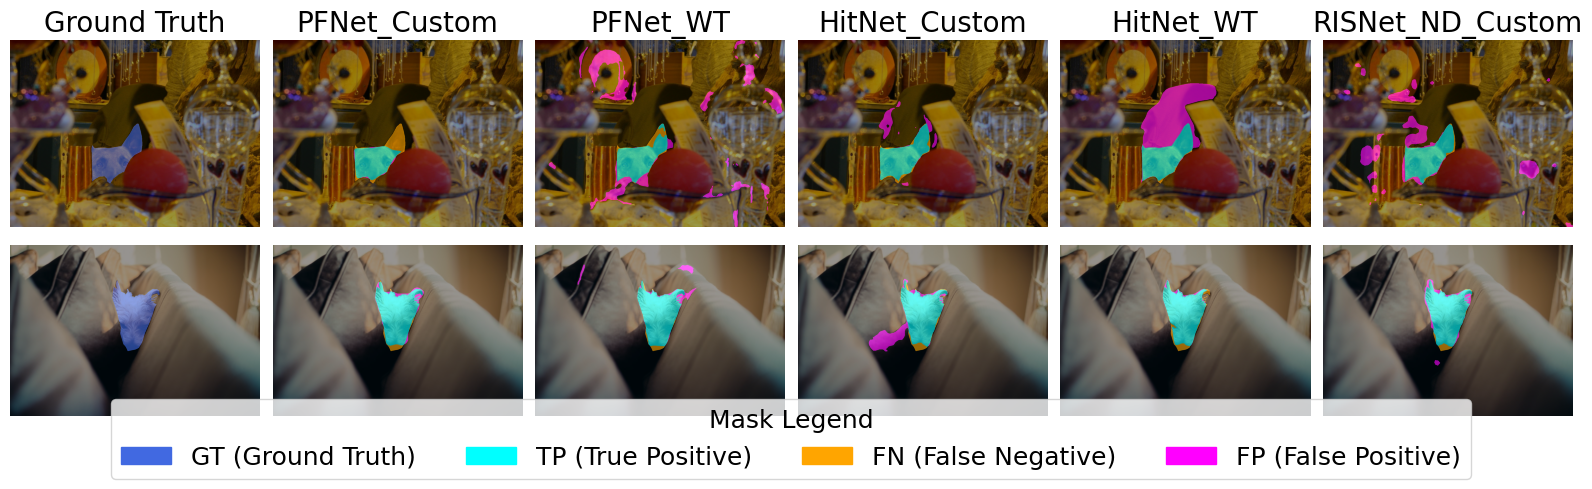

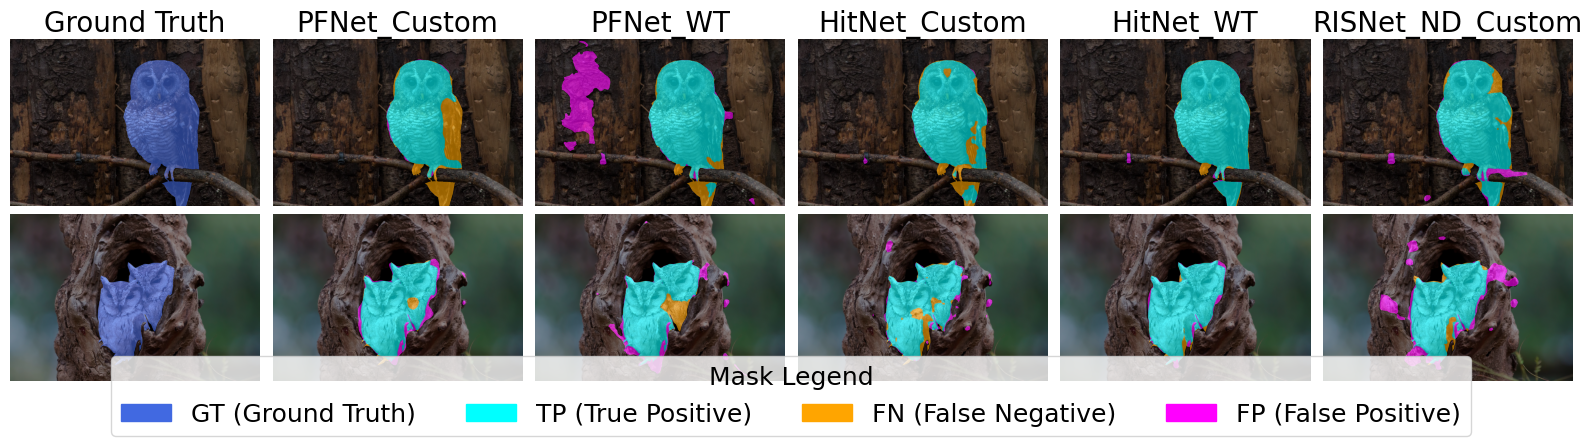

In [10]:
for cls in classes:
    utils.display_images2(images=2, image_files=COD_results[cls], 
                         title="", 
                         save_path="results-{}.png".format(cls), networks=networks, pred_network_roots=pred_roots)

# Metrics Computation

The custom function uses the py_sod_metrics library found here: https://github.com/lartpang/PySODMetrics

The library works by incrementally updating a moving metric after each prediction and ground truth pair is passed to the metric object.
After passing each image to the objects, the final results of each metric is returned with the helper function.

In [11]:
import os
import numpy as np
import pandas as pd

from utils.py_sod_metrics import sod_metrics

from PIL import Image

def get_metrics(gts, preds):
    EMeasure = sod_metrics.Emeasure()
    MAEMeasure = sod_metrics.MAE()
    SMeasure = sod_metrics.Smeasure()
    FWBMeasure = sod_metrics.WeightedFmeasure()

    for gt_path, pred_path in zip(gts, preds):
        gt = np.array(Image.open(gt_path))
        pred = np.array(Image.open(pred_path))

        EMeasure.step(gt, pred)
        MAEMeasure.step(gt, pred)
        SMeasure.step(gt, pred)
        FWBMeasure.step(gt, pred)

    return {
        "S": round(SMeasure.get_results()["sm"], 3),
        "FWB": round(FWBMeasure.get_results()["wfm"], 3),
        "E": round(EMeasure.get_results()["em"]["adp"], 3),
        "MAE": round(MAEMeasure.get_results()["mae"], 3)
    }

First, the overall average performance of each network is saved for each metric. Additionally, to observe how the network performs class-wise, the average performance in each class is also saved.

In [12]:
import os
import pandas as pd

results = []
avg_results = []
networks_to_eval = ['PFNet_Custom', 'PFNet_WT', 'HitNet_Custom', 'HitNet_WT', 'RISNet_ND_Custom']
pred_roots_to_eval = ['Results/' + network + "/Sampled_COD10K/" for network in networks_to_eval]

print("\n===== STARTING EVALUATION =====\n")

for network_name, pred_root in zip(networks_to_eval, pred_roots_to_eval):

    preds = [os.path.join(pred_root, f.replace(".jpg", ".png")) for f in COD_results_list]
    gts = [os.path.join(pred_root, f.replace(".jpg", ".png")) for f in COD_results_list]
    avg_metrics = get_metrics(gts, preds)

    print(network_name)

    row = {"Network": network_name, "Class": "AVERAGE", **avg_metrics}
    avg_row = {"Network": network_name, **avg_metrics}
    results.append(row)
    avg_results.append(avg_row)

    for cls in classes:

        gts_class = [os.path.join(utils.gt_root, f.replace(".jpg", ".png")) for f in COD_results[cls]]
        preds_class = [os.path.join(pred_root, f.replace(".jpg", ".png")) for f in COD_results[cls]]

        metrics = get_metrics(gts_class, preds_class)

        row = {"Network": network_name, "Class": cls, **metrics}
        results.append(row)

        print(f"{network_name} | {cls}")
        print("-" * 40)
        print(f"S   : {metrics['S']}")
        print(f"FWB : {metrics['FWB']}")
        print(f"E   : {metrics['E']}")
        print(f"MAE : {metrics['MAE']}\n")

    # Save all to CSV (per network)
    df = pd.DataFrame([r for r in results if r['Network'] == network_name])
    df.to_csv(f"Data/cod_results_{network_name}.csv", index=False)

# Save combined results
pd.DataFrame(results).to_csv("Data/cod_eval_results.csv", index=False)
pd.DataFrame(avg_results).to_csv("Data/cod_eval_averages.csv", index=False)




===== STARTING EVALUATION =====

PFNet_Custom
PFNet_Custom | Chameleon
----------------------------------------
S   : 0.695
FWB : 0.489
E   : 0.85
MAE : 0.037

PFNet_Custom | Cat
----------------------------------------
S   : 0.75
FWB : 0.557
E   : 0.895
MAE : 0.058

PFNet_Custom | Dog
----------------------------------------
S   : 0.903
FWB : 0.829
E   : 0.973
MAE : 0.008

PFNet_Custom | Owl
----------------------------------------
S   : 0.81
FWB : 0.7
E   : 0.88
MAE : 0.043

PFNet_WT
PFNet_WT | Chameleon
----------------------------------------
S   : 0.668
FWB : 0.633
E   : 0.914
MAE : 0.04

PFNet_WT | Cat
----------------------------------------
S   : 0.638
FWB : 0.477
E   : 0.716
MAE : 0.083

PFNet_WT | Dog
----------------------------------------
S   : 0.759
FWB : 0.695
E   : 0.832
MAE : 0.034

PFNet_WT | Owl
----------------------------------------
S   : 0.791
FWB : 0.733
E   : 0.893
MAE : 0.051

HitNet_Custom
HitNet_Custom | Chameleon
----------------------------------------
S 

In [13]:
pd.DataFrame(results)
pd.DataFrame(avg_results)

Network      S    FWB      E    MAE
0      PFNet_Custom  0.964  0.868  0.938  0.012
1          PFNet_WT  0.965  0.892  0.942  0.015
2     HitNet_Custom  0.969  0.946  0.954  0.007
3         HitNet_WT  0.991  0.991  0.995  0.001
4  RISNet_ND_Custom  0.932  0.782  0.910  0.026